#  K- means Algorithm for clustering:
This is the algorithm under the category of unsupervised learning. In this algorithm we make clusters of the given datapoints on the basis of the distances. The dataset provided to this algorithm is unlabelled unlike the dataset for the classification algorithms.

######  Steps involved in the k-means algorithms:
1. Choose the number k of clusters.
2. Select the random k points( centroids) , can be different from data point.
3. Assign each data point to closest centroid which forms k clusters.
4. Compute and place each centroid of the clusters.
5. Reassign the data points to closest centroids, if there is any reassignment then do to step 4 otherwise the model is ready.

######  Importing the initial libraries :


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

######  importing dataset  and assigning the feature

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Spending Score (1-100)','Annual Income (k$)']]

###### Predicting the optimised number of clusters
To get the optimised number of clusters we use the following method:
1. wcss (Within Cluster Sum of Squares) : it is the sum of the distance of all datapoint of a cluster from the centroid of clusters.
2. Elbow Method : This method plots the number of cluster against the wcss and get optimsed  number of clusters
3. inertia_ : it is the tool used to calculate the  wcss.

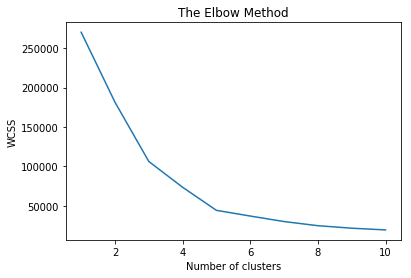

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

looking at above graph, we search for the elbow of the graph which is 5 in above case. This tells you the optimised number of cluster.

######  Model designing and fitting
There are several parameters that is being passed to the model in order to tune hyperparameters:
1. n_clusters : int, optional, default: 8; The number of clusters to form as well as the number of centroids to generate.
2. init : {'k-means++', 'random' or an ndarray};Method for initialization, defaults to 'k-means++':

       a. 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
       b. 'random': choose k observations (rows) at random from data for the initial centroids.
       c. If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

######  Visualisation of the clusters.

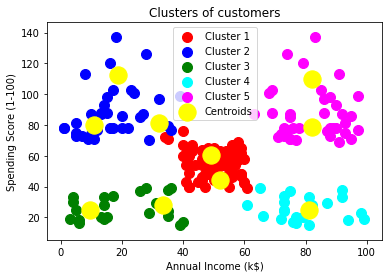

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()